In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, SVR
from sklearn.metrics import classification_report,mean_squared_error, mean_absolute_error, r2_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

## Data

In [57]:
apartments_train = pd.read_csv("../../Grupa1/apartments.csv") # apartments csv from R 
apartments_test = pd.read_csv("../../Grupa1/apartments_test.csv")

In [58]:
apartments_train.head()

,m2.price,construction.year,surface,floor,no.rooms,district
0,5897,1953,25,3,1,Srodmiescie
1,1818,1992,143,9,5,Bielany
2,3643,1937,56,1,2,Praga
3,3517,1995,93,7,3,Ochota
4,3013,1992,144,6,5,Mokotow


We should encode district, lets create dummies

In [59]:
apartments_train = pd.get_dummies(apartments_train, drop_first= True)
apartments_test  = pd.get_dummies(apartments_test, drop_first=True)

In [60]:
apartments_train.head()

,m2.price,construction.year,surface,floor,no.rooms,district_Bielany,district_Mokotow,district_Ochota,district_Praga,district_Srodmiescie,district_Ursus,district_Ursynow,district_Wola,district_Zoliborz
0,5897,1953,25,3,1,0,0,0,0,1,0,0,0,0
1,1818,1992,143,9,5,1,0,0,0,0,0,0,0,0
2,3643,1937,56,1,2,0,0,0,1,0,0,0,0,0
3,3517,1995,93,7,3,0,0,1,0,0,0,0,0,0
4,3013,1992,144,6,5,0,1,0,0,0,0,0,0,0


We will treat `m2.price` as our target. Let's see its density: 

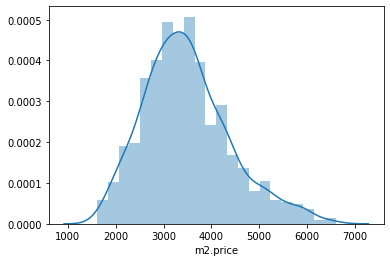

In [162]:
sns.distplot(apartments_train["m2.price"])

density plot looks like normal distribution

## Train and Fit

Lets make pipelines, just like in datacamp scikit learn course

In [61]:
X_train, X_test, y_train, y_test = apartments_train.drop("m2.price", axis =1),apartments_test.drop("m2.price", axis =1) , apartments_train["m2.price"],apartments_test["m2.price"] 

In [152]:
steps = [('scaler', StandardScaler()), # scaling
         ('SVM'   , SVR())]            # Support vector regressor

pipe = Pipeline(steps)

parameters = {
    "SVM__C": [0.001, 0.01, 0.05, 1, 4, 10, 25, 100, 1000],
    "SVM__gamma": [0.001, 0.01, 0.05, 2, 4, 10, 25, 100, 1000],
    "SVM__degree": [1,2,3,4,5,8,12,15,18,20]
}

rsc = GridSearchCV(pipe, parameters, cv=5)

rsc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('SVM',
                                        SVR(C=1.0, cache_size=200, coef0=0.0,
                                            degree=3, epsilon=0.1,
                                            gamma='scale', kernel='rbf',
                                            max_iter=-1, shrinking=True,
                                            tol=0.001, verbose=False))],
                                verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'SVM__C': [0.001, 0.01, 0.05, 1, 4, 10, 25, 100, 1000],
                         'SVM__degree': [1, 2, 3, 4, 5, 8, 12, 15, 18, 20],


In [153]:
rsc.best_params_

{'SVM__C': 1000, 'SVM__degree': 1, 'SVM__gamma': 0.05}

In [155]:
y_pred = rsc.predict(X_test)

In [156]:
def regression_report(y_pred, y_test):
    
    mae  = mean_absolute_error(y_test, y_pred) 
    rmse = mean_squared_error(y_test, y_pred, squared= False) # RMSE
    r2   = r2_score(y_test, y_pred)
    
    mae_str  = "Mean absolute error"
    rmse_str = "Root mean squared error"
    r2_str   = "R2 score"
    print(f"{mae_str:^15} {rmse_str:^30} {r2_str:^40}")
    print(f"{mae:^15} {rmse:^30} {r2:^40}")
    

    return

In [157]:
regression_report(y_pred, y_test)

Mean absolute error    Root mean squared error                     R2 score                
124.16258900988625       160.08615370994968                  0.9683924092901438           


In my opinion this is very good. Let's see how would it perform without scale

### Bonus - without scaling

In [158]:
steps = [('SVM'   , SVR())]            # Support vector regressor

pipe = Pipeline(steps)

parameters = {
    "SVM__C": [0.001, 0.01, 0.05, 1, 4, 10, 25, 100, 1000],
    "SVM__gamma": [0.001, 0.01, 0.05, 2, 4, 10, 25, 100, 1000],
    "SVM__degree": [1,2,3,4,5,8,12,15,18,20]
}

rsc = GridSearchCV(pipe, parameters, cv=5)

rsc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('SVM',
                                        SVR(C=1.0, cache_size=200, coef0=0.0,
                                            degree=3, epsilon=0.1,
                                            gamma='scale', kernel='rbf',
                                            max_iter=-1, shrinking=True,
                                            tol=0.001, verbose=False))],
                                verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'SVM__C': [0.001, 0.01, 0.05, 1, 4, 10, 25, 100, 1000],
                         'SVM__degree': [1, 2, 3, 4, 5, 8, 12, 15, 18, 20],
                         'SVM__gamma': [0.001, 0.01, 0.05, 2, 4, 10, 25, 100,
                                        1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [159]:
y_pred = rsc.predict(X_test)
regression_report(y_pred, y_test)

Mean absolute error    Root mean squared error                     R2 score                
501.6950539209975       742.7382020900471                   0.3196139876532391           


### Results
SVM are very good at this data. We could clearly see why scaling the data is obligatory task befor fitting model. 

## Wine - categorization
### Data

In [8]:
wine = pd.read_csv("~/Downloads/winequality-red.csv") # from kaggle

In [9]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [10]:
wine.shape

(1599, 12)

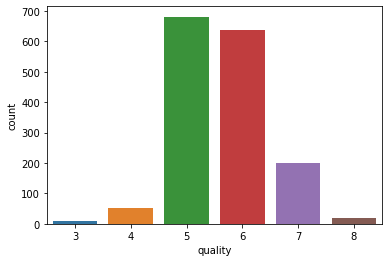

In [11]:
sns.countplot(x="quality", data=wine)

Let's say we want to categorize wine as good (>=6) and bad (< 6). That way classes will be well balanced.  

In [12]:
wine.quality = np.where(wine.quality.to_numpy() >= 6, 1, 0)

## Train with and without scaling

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    wine.drop("quality", axis=1), wine.quality, test_size=0.2, random_state=42)

In [14]:
svc = SVC(probability= True)

In [15]:
svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [16]:
y_pred_not_scaled = svc.predict(X_test)
y_prob_not_scaled = svc.predict_proba(X_test)[:,1]

In [17]:
print(classification_report(y_test, y_pred_not_scaled))

              precision    recall  f1-score   support

           0       0.68      0.34      0.45       141
           1       0.63      0.87      0.73       179

    accuracy                           0.64       320
   macro avg       0.65      0.61      0.59       320
weighted avg       0.65      0.64      0.61       320



In [18]:
steps = [('scaler', StandardScaler()),
         ('SVM'   , SVC(probability= True))]

pipe = Pipeline(steps)

parameters = {
    "SVM__C": [0.001, 0.01, 0.05, 1, 1.5, 2, 4, 10, 25, 100, 1000],
    "SVM__gamma": [0.001, 0.01, 0.05, 1, 1.5, 2, 4, 10, 25, 100, 1000],
    "SVM__degree": np.arange(1, 20)
}

rsc = RandomizedSearchCV(pipe, parameters, cv=5)

rsc.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('scaler',
                                              StandardScaler(copy=True,
                                                             with_mean=True,
                                                             with_std=True)),
                                             ('SVM',
                                              SVC(C=1.0, break_ties=False,
                                                  cache_size=200,
                                                  class_weight=None, coef0=0.0,
                                                  decision_function_shape='ovr',
                                                  degree=3, gamma='scale',
                                                  kernel='rbf', max_iter=-1,
                                                  probability=True,
                                                 

In [19]:
rsc.best_params_, rsc.best_score_

({'SVM__gamma': 0.01, 'SVM__degree': 9, 'SVM__C': 1000}, 0.7553124999999999)

In [20]:
y_pred_scaled = rsc.predict(X_test)
y_prob_scaled = rsc.predict_proba(X_test)[:,1]


print(classification_report(y_test, y_pred_scaled))

              precision    recall  f1-score   support

           0       0.75      0.77      0.76       141
           1       0.82      0.79      0.80       179

    accuracy                           0.78       320
   macro avg       0.78      0.78      0.78       320
weighted avg       0.79      0.78      0.78       320



## Results 

In [21]:
print(f'AUC not-scaled: {roc_auc_score(y_test, y_pred_not_scaled)}')
print(f'AUC scaled:     {roc_auc_score(y_test, y_pred_scaled)} ')

AUC not-scaled: 0.6059669559015809
AUC scaled:     0.7831728673877729 


In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

In [27]:
y_prob_scaled.shape , y_test.shape

((320,), (320,))

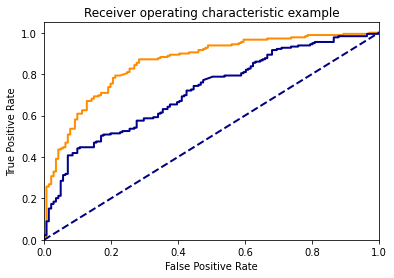

In [34]:
fpr1, tpr1, _ = roc_curve(y_test, y_prob_scaled)
fpr2, tpr2, _ = roc_curve(y_test, y_prob_not_scaled)

plt.figure()
lw = 2
plt.plot(fpr1, tpr1, color='darkorange',
         lw=lw)
plt.plot(fpr2, tpr2, color='darkblue',
         lw=lw)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.show()

Where blue line is representing model that did not scale data before. So in 2 examples both in regression and classification scaling data is very important step.